<h1>                              User Analytics in the Telecommunication Industry                            </h1>

![Telecommunication mast image](telecommunication.jpg)



<p> Tellco is a Telecommunication Company that is about to be bought by an Investor. The Investor has employed a Data Scientist to carry out series of evaluation test on the data in order to kow if the Company is worth purchasing. </p>
<p> The task is broken into four. </p>
<ol>  
    <li>  User Overview </li>
    <li>  User Engagement </li>
    <li>  User Experience </li>
    <li>  User Satisfaction </li>
</ol>

<h4> User Overview </h4>
<p> Under this section. It is required to carryout series of exploratory analysis about the users of the company in a simple way.  The lifeblood of any business is its customers. Businesses are always finding ways to better understand their customers so that they can provide more efficient and tailored solutions to them. Exploratory Data Analysis is a fundamental step in the data science process. It involves all the processes used to familiarize oneself with the data and explore initial insights that will inform further steps in the data science process. It is always better to explore each data set using multiple exploratory techniques and compare the results. The goal of this step is to understand the dataset, identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. It suggests the next logical steps, questions, or areas of research for your project.</p>

<h4> User Engagement </h4>

As telecom brands are the data providers of all online activities, meeting user requirements, and creating an engaging user experience is a prerequisite for them. Building & improving the QoS (Quality of Service) to leverage the mobile platforms and
to get more users for the business is good but the success of the business would be determined by the user engagement and activity of the customers on available apps. In telecommunication, tracking the user activities on the database sessions is a good
starting point to appreciate the user engagement for the overall applications and per application as well. If we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to
concentrate network resources for different clusters of customers based on the engagement scores.

<h4> User Experience </h4>

The Telecommunication industry has experienced a great revolution since the last decade. Mobile devices have become the new fashion trend and play a vital role in everyone's life. The success of the mobile industry is by and large dependent on its
consumers. Therefore, it is necessary for the vendors to focus on their target audience i.e. what are the needs and requirements of their consumers and how they feel and perceive their products. Tracking & evaluation of customers’ experience can help the
organizations to optimize their products and services so that it meets the evolving user expectations, needs, and acceptance.
In the telecommunication industry, the user experience is related, most of the time, to network parameter performances or the customers’ device characteristics.

<h4> User Satisfaction </h4>

<h2>Table of Content </h2>


- [Import Libraries](#Import_Libraries)
- [Read Data from Data Folder](#Read_data)
- [User Overview Analysis](#user_overview)
 - [Task 1.1](#task1)

In [106]:
"""
# install necessary dependencies.

!pip install openpyxl
import openpyxl

"""
# import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import statistical libraries
from scipy import stats
from scipy.stats import norm

# import machine learning libraries
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.impute import SimpleImputer 
from sklearn.cluster import KMeans

# import other dependencies
import plotly.express as px

# 
import warnings
warnings.simplefilter(action = 'ignore')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#sns.set(style="whitegrid")
#sns.set_context('notebook')

<h5><a id = "Read_data"> Read Data from File </a></h5>

In [3]:
data = pd.read_excel('../data/Week2_challenge_data_source.xlsx', na_values =['','na','Nan','nan','Null','null',' '])

<p> Knowing the set of features to work it makes it easy to explore the data especially in cases if the data has alot of featurs. Some of the features might not be important to the analyst at the moment when analysing the data set</p>

<h4><a id="user_overview"> User Overview Analysis </a></h4>

<h5>Identify Features to work it</h5>

- MSISDN/Number
- Bearer Id
- Handset Type
- Handset Manufacturer
- XDR as Data Session
- Applications
 - Social Media
 - Google
 - YouTube
 - NetFlix
 - Gaming
 - Email
 - Other
- Total Download DL
- Total Upload UL

In [4]:
data_overview =  data[['MSISDN/Number','Bearer Id','Handset Type','Handset Manufacturer','Dur. (ms).1',\
             'Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)',\
             'Google DL (Bytes)','Google UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',\
             'Gaming DL (Bytes)','Gaming UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)',\
             'Other DL (Bytes)','Other UL (Bytes)','Total DL (Bytes)','Total UL (Bytes)']]

In [5]:
print(f'The data contains {data_overview.shape[0]} rows and {data_overview.shape[1]} columns')

The data contains 150001 rows and 21 columns


In [6]:
data_overview.head()

,MSISDN/Number,Bearer Id,Handset Type,Handset Manufacturer,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Email DL (Bytes),Email UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,3.366496e+10,13114483460844900352,Samsung Galaxy A5 Sm-A520F,Samsung,1.823653e+09,1545765.0,24420.0,15854611.0,2501332.0,1634479.0,1271433.0,8198936.0,9656251.0,278082303.0,14344150.0,3563542.0,137762.0,171744450.0,8814393.0,308879636.0,36749741.0
1,3.368185e+10,13114483482878900224,Samsung Galaxy J5 (Sm-J530),Samsung,1.365104e+09,1926113.0,7165.0,20247395.0,19111729.0,3493924.0,920172.0,18338413.0,17227132.0,608750074.0,1170709.0,629046.0,308339.0,526904238.0,15055145.0,653384965.0,53800391.0
2,3.376063e+10,13114483484080500736,Samsung Galaxy A8 (2018),Samsung,1.361763e+09,1684053.0,42224.0,19725661.0,14699576.0,8535055.0,1694064.0,17587794.0,6163408.0,229584621.0,395630.0,2690151.0,672973.0,410692588.0,4215763.0,279807335.0,27883638.0
3,3.375034e+10,13114483485442799616,undefined,undefined,1.321510e+09,644121.0,13372.0,21388122.0,15146643.0,9023734.0,2788027.0,13994646.0,1097942.0,799538153.0,10849722.0,1439754.0,631229.0,749039933.0,12797283.0,846028530.0,43324218.0
4,3.369980e+10,13114483499480700928,Samsung Sm-G390F,Samsung,1.089009e+09,862600.0,50188.0,15259380.0,18962873.0,6248284.0,1500559.0,17124581.0,415218.0,527707248.0,3529801.0,1936496.0,173853.0,550709500.0,13910322.0,569138589.0,38542814.0


In [7]:
data.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [8]:
# lists of various data types and insert similar features into this list
# this function separates features into numerical and categorial list

def list_datatype(df):
    
    num = []
    cat = []
    
    for feature in df.columns:
        if df[feature].dtype in ['object',]:
            cat.append(feature)
        if df[feature].dtype in ['float','int']:
            num.append(feature)
            
    return num, cat
    

In [9]:
num , cat = list_datatype(data_overview)

In [10]:
data_overview[cat].head()

,Bearer Id,Handset Type,Handset Manufacturer
0,13114483460844900352,Samsung Galaxy A5 Sm-A520F,Samsung
1,13114483482878900224,Samsung Galaxy J5 (Sm-J530),Samsung
2,13114483484080500736,Samsung Galaxy A8 (2018),Samsung
3,13114483485442799616,undefined,undefined
4,13114483499480700928,Samsung Sm-G390F,Samsung


In [11]:
data_overview[num].head()

,MSISDN/Number,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Email DL (Bytes),Email UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,3.366496e+10,1.823653e+09,1545765.0,24420.0,15854611.0,2501332.0,1634479.0,1271433.0,8198936.0,9656251.0,278082303.0,14344150.0,3563542.0,137762.0,171744450.0,8814393.0,308879636.0,36749741.0
1,3.368185e+10,1.365104e+09,1926113.0,7165.0,20247395.0,19111729.0,3493924.0,920172.0,18338413.0,17227132.0,608750074.0,1170709.0,629046.0,308339.0,526904238.0,15055145.0,653384965.0,53800391.0
2,3.376063e+10,1.361763e+09,1684053.0,42224.0,19725661.0,14699576.0,8535055.0,1694064.0,17587794.0,6163408.0,229584621.0,395630.0,2690151.0,672973.0,410692588.0,4215763.0,279807335.0,27883638.0
3,3.375034e+10,1.321510e+09,644121.0,13372.0,21388122.0,15146643.0,9023734.0,2788027.0,13994646.0,1097942.0,799538153.0,10849722.0,1439754.0,631229.0,749039933.0,12797283.0,846028530.0,43324218.0
4,3.369980e+10,1.089009e+09,862600.0,50188.0,15259380.0,18962873.0,6248284.0,1500559.0,17124581.0,415218.0,527707248.0,3529801.0,1936496.0,173853.0,550709500.0,13910322.0,569138589.0,38542814.0


<p> The Bearer Id  </p>

In [12]:
def nunique_items(df):
    
    for i in df.columns:
        unique = df[i].nunique()
        print('The number of unique items in {0} is {1}'.format(i , unique))
        

In [13]:
categorical_data = data_overview[cat]
nunique_items(categorical_data)

The number of unique items in Bearer Id is 134709
The number of unique items in Handset Type is 1396
The number of unique items in Handset Manufacturer is 170


In [14]:
# check the total number of null values in each categorical column

categorical_data.isna().sum()

Bearer Id                 0
Handset Type            572
Handset Manufacturer    572
dtype: int64

In [15]:
# percentage of null values 

(categorical_data.isna().sum() / len(categorical_data)) * 100

Bearer Id               0.000000
Handset Type            0.381331
Handset Manufacturer    0.381331
dtype: float64

In [16]:
# function to check if a value is a string object
# returns a boolean value True --> if its a string   False --> if its not a string object

def is_str(s):
    a = isinstance(s,str)
    return a

In [17]:
# apply the string object check function to the Bearer Id column
# Bearer Id had a number of float  values but its type is object
# you can check the categorical['Bearer Id'].dtype  which return object dtype
# this checks if the column contains any string value
# returns total number of rows astring appears

categorical_data['Bearer Id'].apply(is_str).sum()

991

In [18]:
# prints out an ovverview of observations that have Bearer Id has a string

categorical_data[categorical_data['Bearer Id'].apply(is_str)].head(10)

,Bearer Id,Handset Type,Handset Manufacturer
463,,NaN,NaN
478,,NaN,NaN
503,,NaN,NaN
4176,,Huawei Honor 10,Huawei
4365,,NaN,NaN
4476,,NaN,NaN
4554,,NaN,NaN
4581,,NaN,NaN
4686,,NaN,NaN
4966,,NaN,NaN


> ### Check for in numerical features

In [19]:
# create a numerical dataframe

numerical_data = data_overview[num]

In [20]:
# check the total number of null values in each column of the dataframe

numerical_data.isna().sum()

MSISDN/Number              1066
Dur. (ms).1                   1
Social Media DL (Bytes)       0
Social Media UL (Bytes)       0
Youtube DL (Bytes)            0
Youtube UL (Bytes)            0
Google DL (Bytes)             0
Google UL (Bytes)             0
Netflix DL (Bytes)            0
Netflix UL (Bytes)            0
Gaming DL (Bytes)             0
Gaming UL (Bytes)             0
Email DL (Bytes)              0
Email UL (Bytes)              0
Other DL (Bytes)              0
Other UL (Bytes)              0
Total DL (Bytes)              1
Total UL (Bytes)              1
dtype: int64

<h5> Drop Rows </h5>
    
<p>From the exploratory analysis above, we nooticed that Bearer Id contains str object this object are empty strings and do not contain any information about the the user session so it should be dropped the MSISDN contains some missing values. This values cannot be imputed as there are unique MSISDN is synonymous to a mobile user phone number. <p>
    

In [21]:
#bearer = pd.to_numeric(data['Bearer Id'], errors = 'coerce')

In [22]:
"""
remove rows with empty strings and missing values
MSISDN/Number is a unique identifier to users and 
null entries cannot be imputed with mode/mean/median

using mode would skew the the data to a particular user
during modelling and other exploratory analysis

"""

data_overview.drop(data_overview.loc[data_overview['Bearer Id'].apply(is_str)].index, inplace = True)

data_overview.drop(data_overview.loc[data_overview['MSISDN/Number'].isna()].index, inplace = True)

<h4> convert MSISDN to string so that its plotted as a categorical variable </h4>

In [23]:
data['MSISDN/Number'] = data['MSISDN/Number'].astype('str')

<h5> <a id = 'task1' > TASK 1.1 </a> </h5>

#### Top 10 Handsets used by Customers

In [24]:
handset = pd.DataFrame(data_overview['Handset Type'].value_counts().head(11)).reset_index()
handset.columns= ['Handset Type', 'Customer count']
handset_10 = handset.drop(handset.index[3])

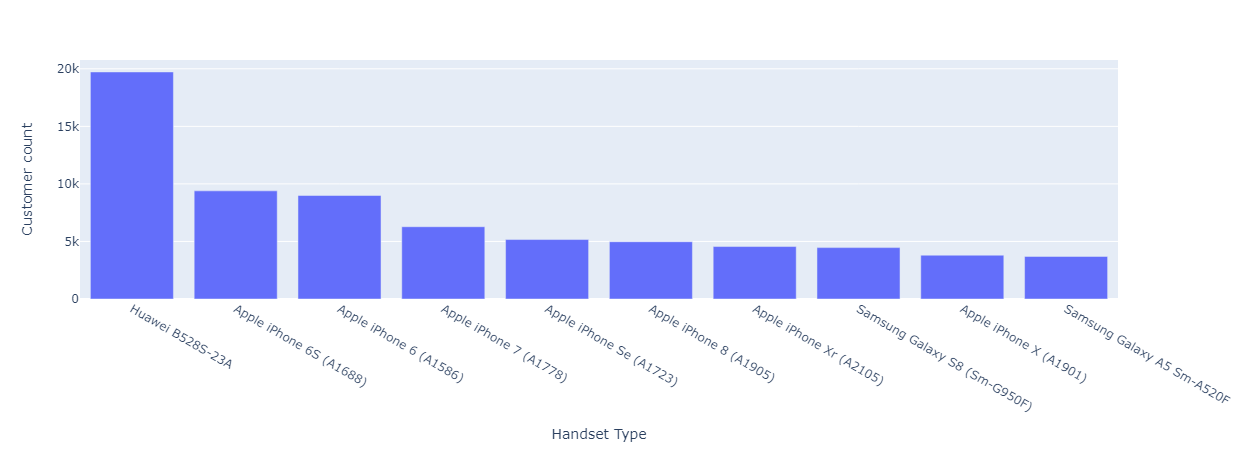

In [26]:
fig = px.bar(handset_10, x='Handset Type', y='Customer count')
fig.show()

#### Top 3 Handset Manufacturers

In [27]:
top_manufacturers = data_overview['Handset Manufacturer'].value_counts()[:3].reset_index()
top_manufacturers.columns = ['Manufacturer', 'Total phone produced']

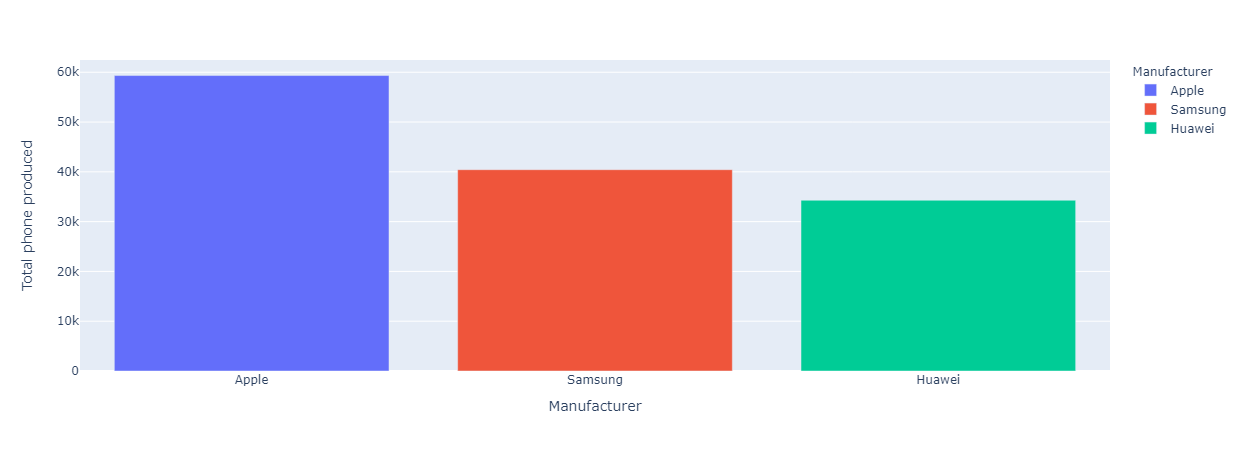

In [28]:
fig = px.bar(top_manufacturers, x='Manufacturer', y='Total phone produced', color = 'Manufacturer')
fig.show()

#### top 5 handsets per handset manufacturer

In [29]:
top_5 = data_overview.groupby(['Handset Manufacturer','Handset Type'])['Handset Type'].count().reset_index(name = 'count')

In [30]:
top5_per_handset = top_5.sort_values(by = ['Handset Manufacturer','count'], ascending = False).groupby('Handset Manufacturer').head(5)

In [31]:
top_5 = top5_per_handset[top5_per_handset['Handset Manufacturer'].isin(['Apple','Samsung','Huawei'])]

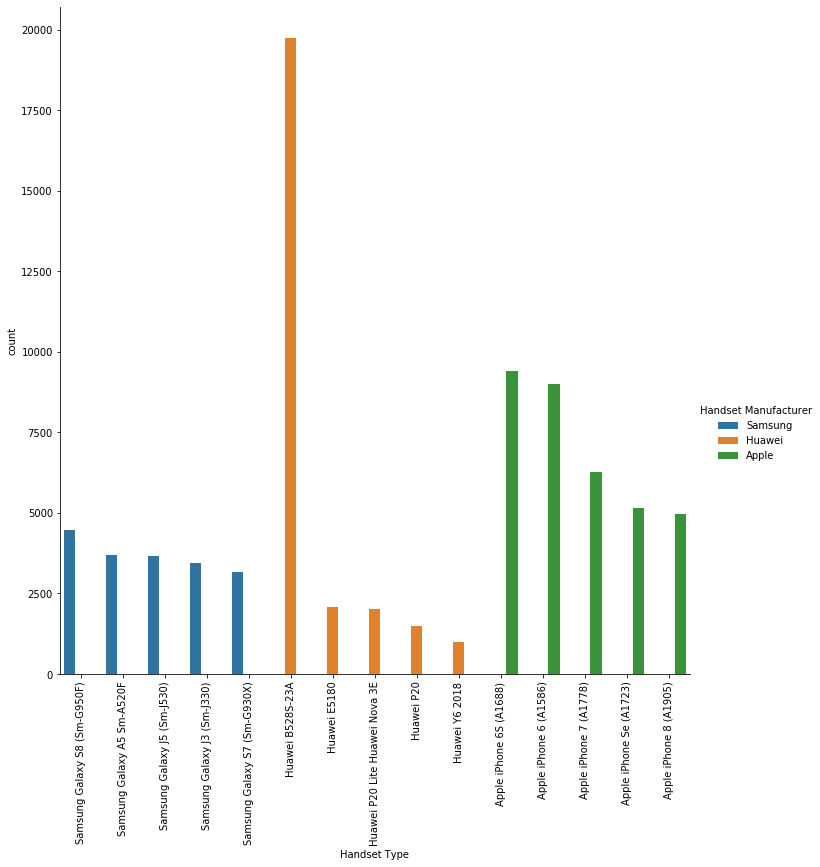

In [32]:
sns.catplot(x="Handset Type", y="count", hue = 'Handset Manufacturer', data=top_5, kind = 'bar', size = 10)
plt.xticks(rotation=90)
plt.show()

* ##### Bearer Id
* ##### Dur. (ms).1
* ##### Total UL (Bytes)
* ##### Total DL (Bytes)
* ##### Social_media Data Volume
* ##### Google Data Volume
* ##### Other Data Volume
* ##### Email Data Volume
* ##### Youtube Data Volume
* ##### Netflix Data Volume
* ##### Gaming Data Volume

#### Convert bytes to megabytes to understand user usage of various data usage better

In [33]:
# convert values from bytes to megabytes

def bytes_to_megabytes(num):
    if not isinstance(num, str):
        mb = 1024 ** 2
        return float('{0:.2f}'.format(num/mb))
    else:
        return num

#### Number of sessions per user

In [34]:
number_of_sessions = data_overview.groupby('MSISDN/Number')['Bearer Id'].size()

In [35]:
session_per_user = number_of_sessions.reset_index(name = 'Session Count')

In [36]:
top_sess_per_user = session_per_user.sort_values(by = 'Session Count'  , ascending = False).head(2000)

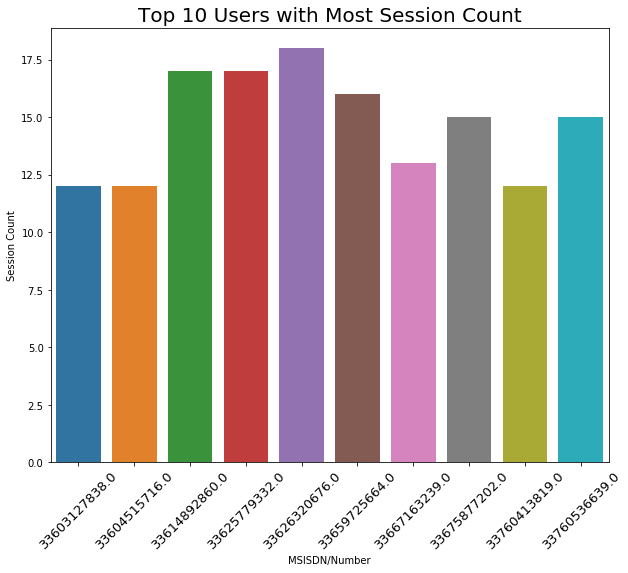

In [37]:
plt.figure(figsize = (10,8))
sns.barplot(data = top_sess_per_user.head(10) , x = 'MSISDN/Number',y = 'Session Count')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users with Most Session Count', fontsize = '20')
plt.show()

In [38]:
#### save top 2000 users with most session count
###top_sess_per_user.to_csv('data/users with highest sessions count')

#### session duration

In [39]:
sessions_duration = data_overview.groupby('MSISDN/Number')['Dur. (ms).1'].sum()
session_duration = sessions_duration.reset_index(name = 'total_duration_per_user')

session_duration['total_duration_per_user'] = session_duration['total_duration_per_user'].apply(bytes_to_megabytes)

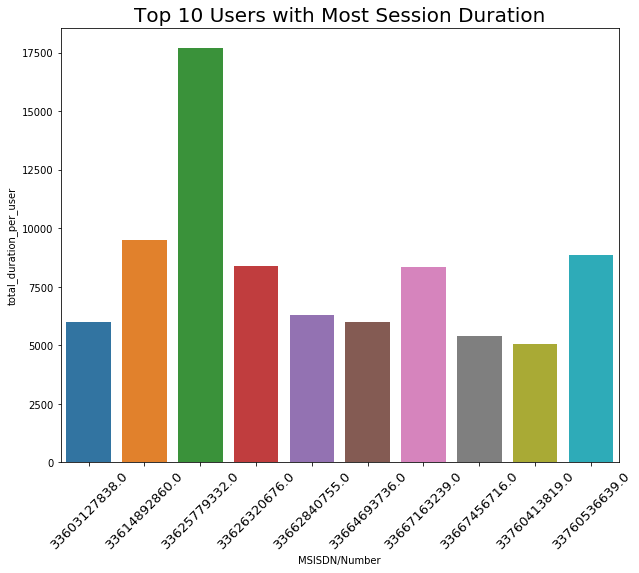

In [40]:
top_total_session = session_duration.sort_values(by = 'total_duration_per_user'  , ascending = False).head(2000)

plt.figure(figsize = (10,8))
sns.barplot(data = top_total_session.head(10) , x = 'MSISDN/Number',y = 'total_duration_per_user')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users with Most Session Duration', fontsize = '20')
plt.show()

In [41]:
#### save top 2000 users with most session duration
#### top_total_session.to_csv('data/users with highest sessions duration')

#### the Total download (DL) and Upload (UL) data

In [42]:
total_download = data_overview.groupby('MSISDN/Number')['Total UL (Bytes)','Total DL (Bytes)'].sum().reset_index()

total_download[['Total UL (Bytes)','Total DL (Bytes)']] = total_download[['Total UL (Bytes)','Total DL (Bytes)']].applymap(bytes_to_megabytes)

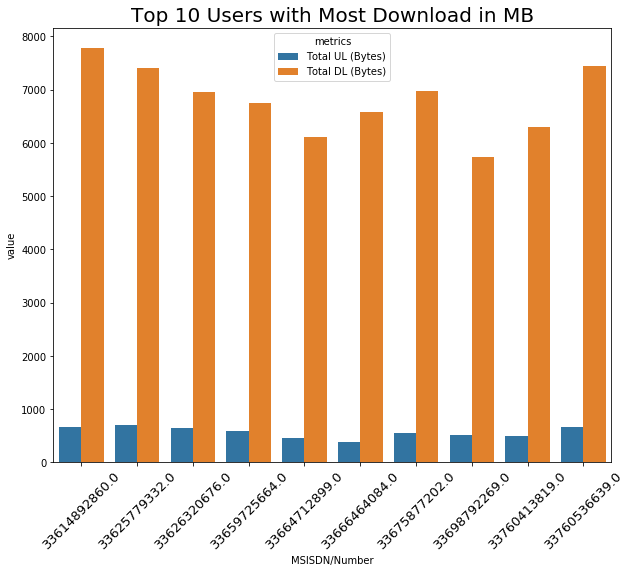

In [43]:
total_download = total_download.sort_values(by = ['Total DL (Bytes)','Total UL (Bytes)']  , ascending = [False,False]).head(2000)

agg_users = pd.melt(id_vars=['MSISDN/Number'], value_vars=['Total UL (Bytes)','Total DL (Bytes)'],
        value_name='value', var_name='metrics', frame=total_download.head(10))

plt.figure(figsize = (10,8))
sns.barplot(data = agg_users , x = 'MSISDN/Number',y = 'value', hue = 'metrics')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users with Most Download in MB', fontsize = '20')
plt.show()

In [44]:
#### save top 2000 users with most upload and download data
#### users_with_most_download.to_csv('data/users_with_most_download.csv')

In [45]:
#total_download.get_group(208201448079117.0)

#### Feature Aggregation

#### Total Data Volume for each Application

In [46]:
data['Social_media Data Volume'] = data['Social Media DL (Bytes)'].add(data['Social Media UL (Bytes)'])
data['Google Data Volume'] = data['Google DL (Bytes)'].add(data['Google UL (Bytes)'])
data['Email Data Volume'] = data['Email DL (Bytes)'].add(data['Email UL (Bytes)'])
data['Youtube Data Volume'] = data['Youtube DL (Bytes)'].add(data['Youtube UL (Bytes)'])
data['Netflix Data Volume'] = data['Netflix DL (Bytes)'].add(data['Netflix UL (Bytes)'])
data['Gaming Data Volume'] = data['Gaming DL (Bytes)'].add(data['Gaming UL (Bytes)'])
data['Other Data Volume'] = data['Other DL (Bytes)'].add(data['Other UL (Bytes)'])

In [47]:
total_download_app = data.groupby('MSISDN/Number')['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'].sum().reset_index()

In [48]:
total_download_app_megabytes = total_download_app.applymap(bytes_to_megabytes)

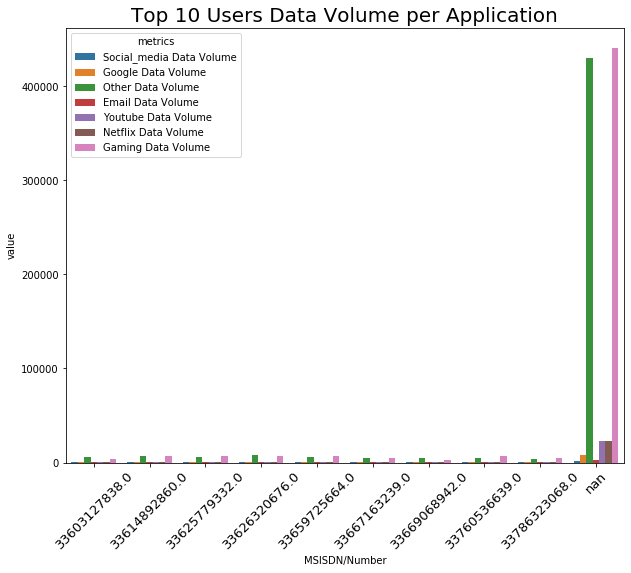

In [49]:
total_download_app_megabytes = total_download_app_megabytes.sort_values(by = ['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'], ascending = [False,False,False,False,False,False,False]).head(2000)

users_per_app = pd.melt(id_vars=['MSISDN/Number'], value_vars=['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'],
        value_name='value', var_name='metrics', frame=total_download_app_megabytes.head(10))

plt.figure(figsize = (10,8))
sns.barplot(data = users_per_app , x = 'MSISDN/Number', y = 'value', hue = 'metrics')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users Data Volume per Application', fontsize = '20')
plt.show()

> #### New dataframe containing metrics for user overview analysis

In [181]:
data2 = data[['Bearer Id','Dur. (ms).1','Total UL (Bytes)','Total DL (Bytes)','Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume']]

In [182]:
# create a new column which is the addition of total download and total upload
data2['Total Data Volume'] = data['Total DL (Bytes)'].add(data['Total UL (Bytes)'])

In [183]:
# applied the conversion on this column --> from bytes to megabytes

data_mb = data2[['Total UL (Bytes)','Total DL (Bytes)','Social_media Data Volume','Google Data Volume',\
        'Other Data Volume', 'Email Data Volume','Youtube Data Volume', 'Netflix Data Volume', \
         'Gaming Data Volume','Total Data Volume']].applymap(bytes_to_megabytes)

In [53]:
# dataframe contains converted values in megabytes
data_mb[['Bearer Id','Dur. (ms).1']] = data2[['Bearer Id','Dur. (ms).1']]

In [54]:
data_mb.head()

,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume,Total Data Volume,Bearer Id,Dur. (ms).1
0,35.05,294.57,1.50,2.77,172.19,3.53,17.51,17.03,278.88,329.62,13114483460844900352,1.823653e+09
1,51.31,623.12,1.84,4.21,516.85,0.89,37.54,33.92,581.67,674.42,13114483482878900224,1.365104e+09
2,26.59,266.85,1.65,9.76,395.69,3.21,32.83,22.65,219.33,293.44,13114483484080500736,1.361763e+09
3,41.32,806.84,0.63,11.26,726.54,1.98,34.84,14.39,772.85,848.15,13114483485442799616,1.321510e+09
4,36.76,542.77,0.87,7.39,538.46,2.01,32.64,16.73,506.63,579.53,13114483499480700928,1.089009e+09


In [55]:
#pd.merge(data2[['Bearer Id','Dur. (ms).1']], data_mb , right_index= True , left_index=True)

In [56]:
#data2[['Bearer Id','Dur. (ms).1']].append(data_mb, ignore_index=True).head()

In [57]:
#data.head()

#### Descriptive analysis

In [58]:
data_mb.describe().T

,count,mean,std,min,25%,50%,75%,max
Total UL (Bytes),150000.0,3.921624e+01,1.075400e+01,2.73,3.168000e+01,39.24,4.676000e+01,7.470000e+01
Total DL (Bytes),150000.0,4.335818e+02,2.328328e+02,6.78,2.318475e+02,434.72,6.348700e+02,8.611400e+02
Social_media Data Volume,150001.0,1.743548e+00,9.876701e-01,0.00,8.900000e-01,1.74,2.600000e+00,3.480000e+00
Google Data Volume,150001.0,7.445623e+00,3.353522e+00,0.04,4.710000e+00,7.45,1.019000e+01,1.481000e+01
Other Data Volume,150001.0,4.094747e+02,2.319985e+02,0.14,2.084300e+02,410.07,6.102800e+02,8.197000e+02
Email Data Volume,150001.0,2.154454e+00,1.021487e+00,0.01,1.300000e+00,2.16,3.010000e+00,4.310000e+00
Youtube Data Volume,150001.0,2.159450e+01,8.818431e+00,0.08,1.526000e+01,21.61,2.794000e+01,4.310000e+01
Netflix Data Volume,150001.0,2.158032e+01,8.831808e+00,0.09,1.524000e+01,21.59,2.793000e+01,4.310000e+01
Gaming Data Volume,150001.0,4.103976e+02,2.327155e+02,0.29,2.086000e+02,411.62,6.117000e+02,8.194000e+02
Total Data Volume,150000.0,4.727980e+02,2.330606e+02,27.61,2.713000e+02,473.84,6.737800e+02,9.117000e+02


In [59]:
b = data_mb.describe()
b = b.iloc[b.index == 'mean',: -1].T.reset_index()

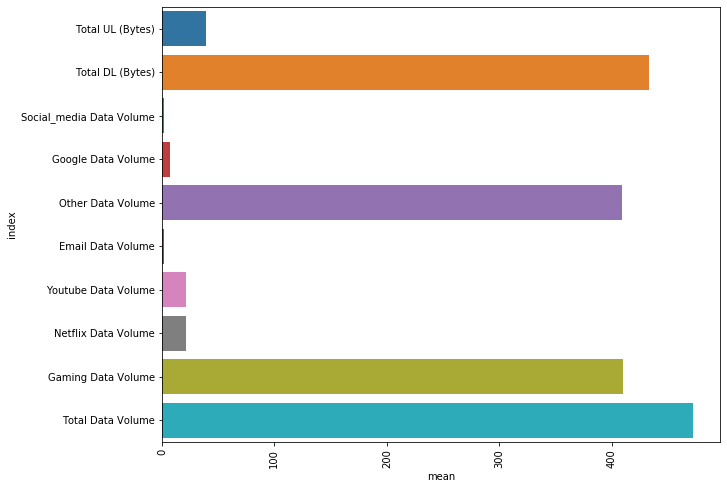

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(data = b, x = 'mean', y= 'index')
plt.xticks(rotation = 90)
plt.show()

 <h4> Univariate Analysis </h4>

In [61]:
def dist(col, data, hist = True , kde = False, size = 8): 

    plot = sns.distplot(data[col], hist = hist, kde = kde)
    plt.xlabel(f'X-axis {c.upper()}')
    plt.ylabel('y-axis')
    plt.title("Distribution"+ " "+ "of" + " "+ " " + c.upper() )
    plt.show()
    return 

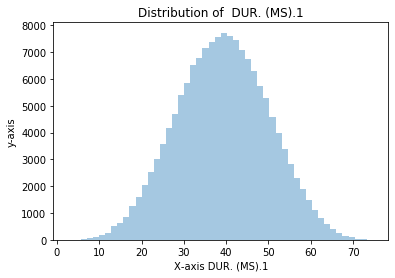

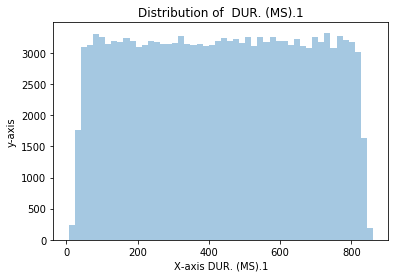

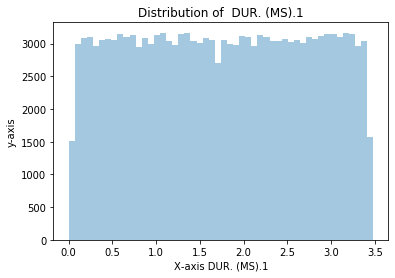

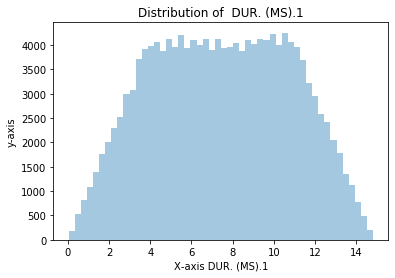

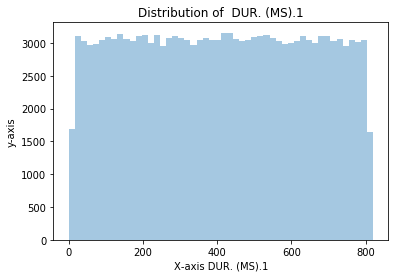

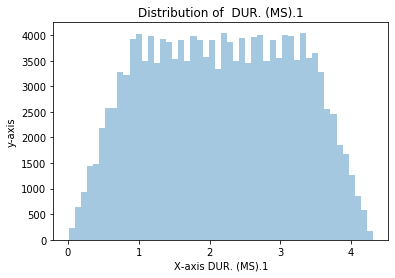

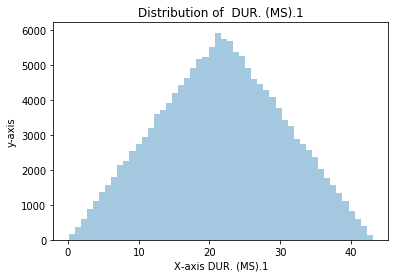

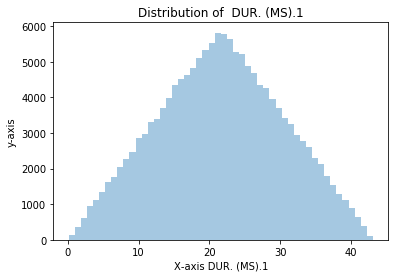

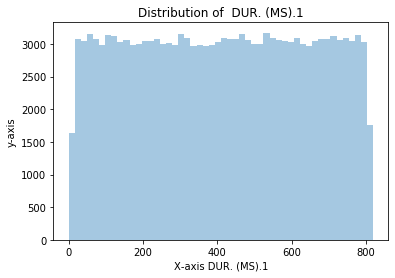

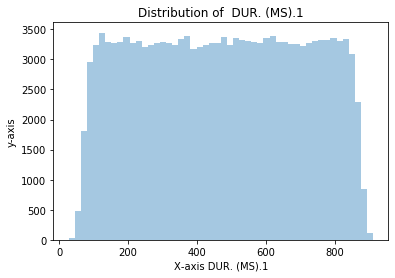

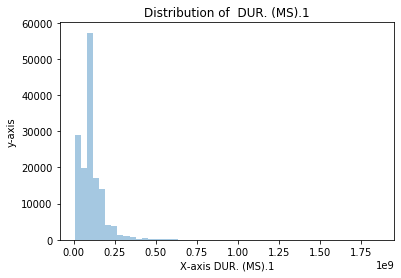

In [77]:
for col in data_mb.select_dtypes(include = ['float64','int64']).columns:
    dist(col, data = data_mb)

In [78]:
def boxplot(x, data):
    plot = sns.boxplot(x= x , data= data)
    plt.title("Boxplot of " + " " + x.upper())
    plt.show()
    return plot

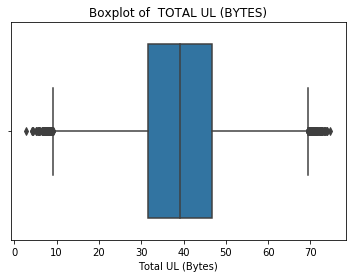

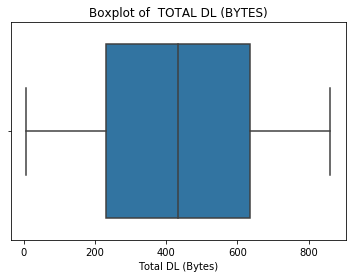

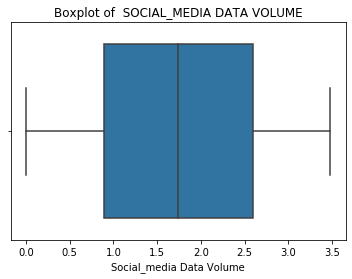

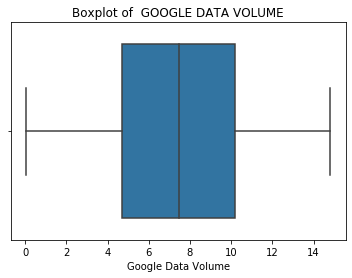

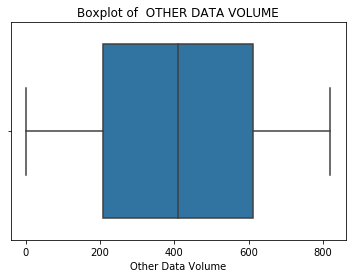

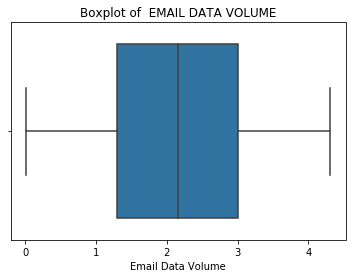

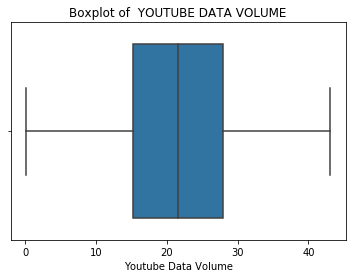

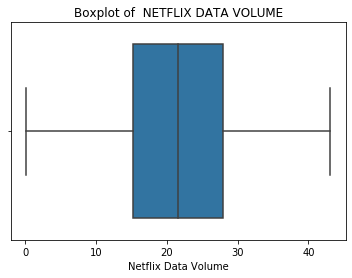

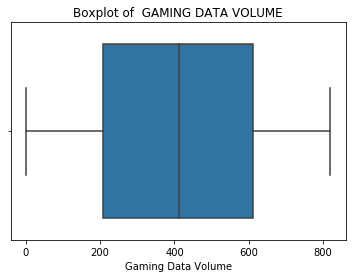

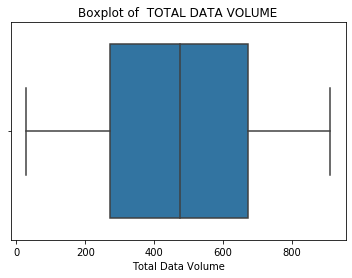

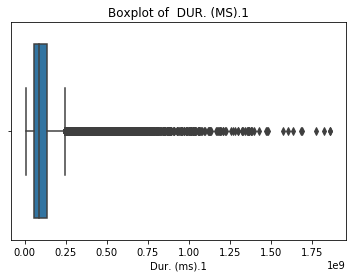

In [79]:
for col in data_mb.select_dtypes(include = ['float64','int64']).columns:
    boxplot(col, data = data_mb)

####  Bivariate Analysis on All applicatiions and Total Data using scatter Plot 

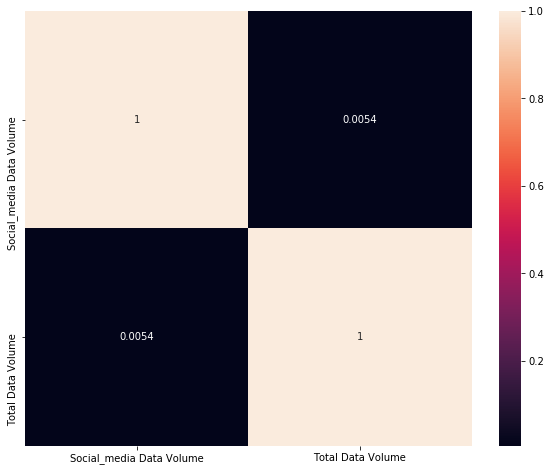

In [80]:
#sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)

fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data_mb[['Social_media Data Volume','Total Data Volume']].corr(), annot = True)

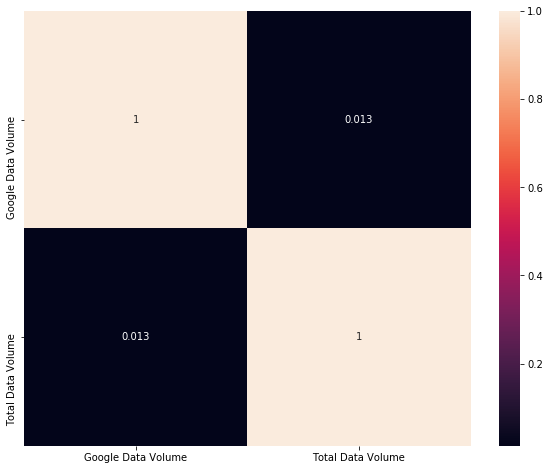

In [81]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data_mb[['Google Data Volume','Total Data Volume']].corr(), annot = True)

#ax = sns.boxplot(data = data2 ,y = 'Google Data Volume', linewidth = 2.5, width = 0.3)

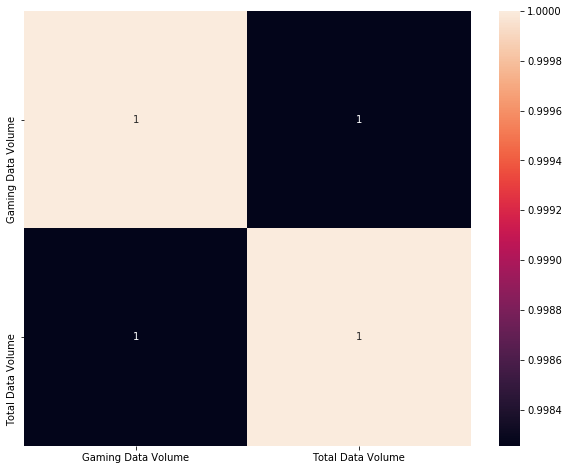

In [82]:
#sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)

#ax = sns.boxplot(data = data2 ,y = 'Gaming Data Volume', linewidth = 2.5, width = 0.3)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data_mb[['Gaming Data Volume','Total Data Volume']].corr(), annot = True)

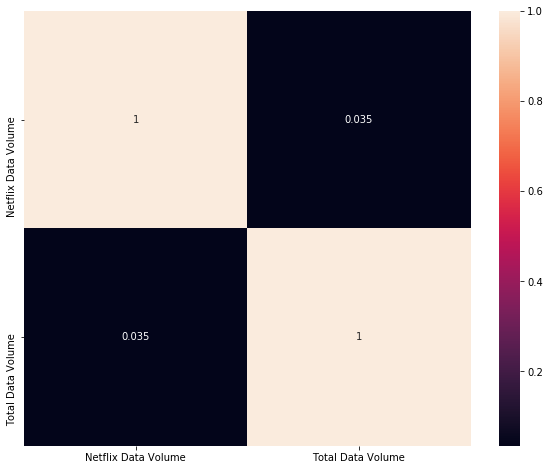

In [83]:
#sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
#ax = sns.boxplot(data = data2 ,y = 'Netflix Data Volume', linewidth = 2.5, width = 0.3)

fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data_mb[['Netflix Data Volume','Total Data Volume']].corr(), annot = True)

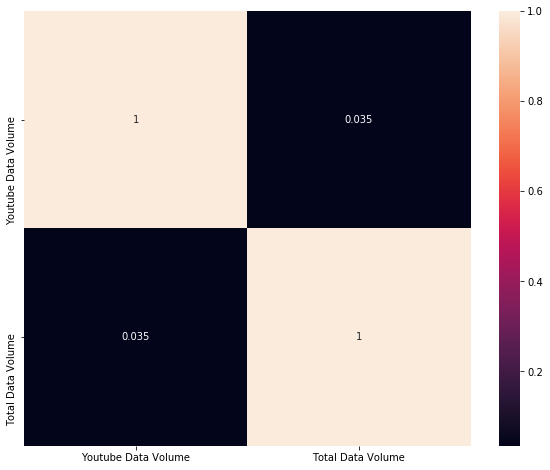

In [84]:
#sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
#ax = sns.boxplot(data = data2 ,y = 'Youtube Data Volume', linewidth = 2.5, width = 0.3)

fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data_mb[['Youtube Data Volume','Total Data Volume']].corr(), annot = True)

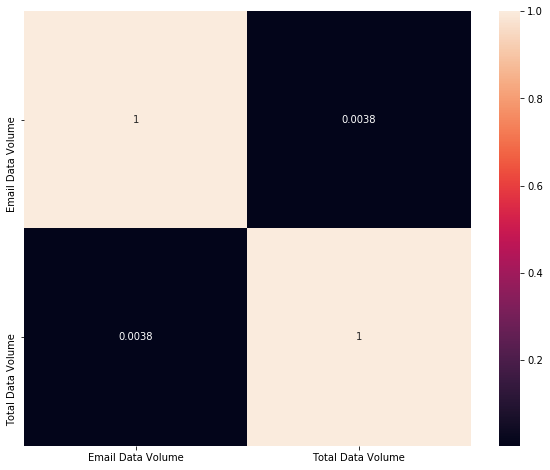

In [85]:
#sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
#ax = sns.scatterplot(data = data_mb ,x = 'Email Data Volume',y='Total Data Volume', marker='D')

fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data_mb[['Email Data Volume','Total Data Volume']].corr(), annot = True)

#### convert milliseconds to seconds from Total Duration of xDr

#### Correlation Matrix

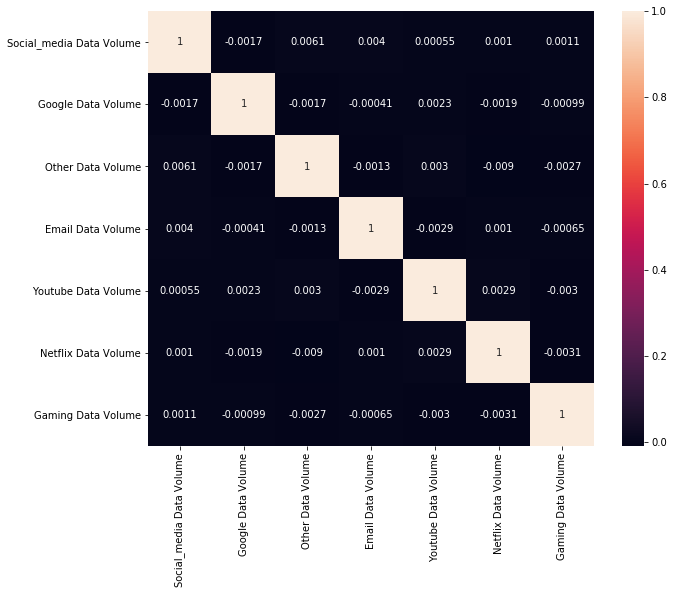

In [86]:
# plot a correlation matrix using the heatmap to show relationship among variables 
# of application

df = data_mb[['Social_media Data Volume','Google Data Volume',\
        'Other Data Volume', 'Email Data Volume','Youtube Data Volume', 'Netflix Data Volume', \
         'Gaming Data Volume']]

fig, ax = plt.subplots(figsize = (10,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True)
#plt.savefig('fig/correlation.png')
plt.show()

#### Use dataframe of columns with bytes data 

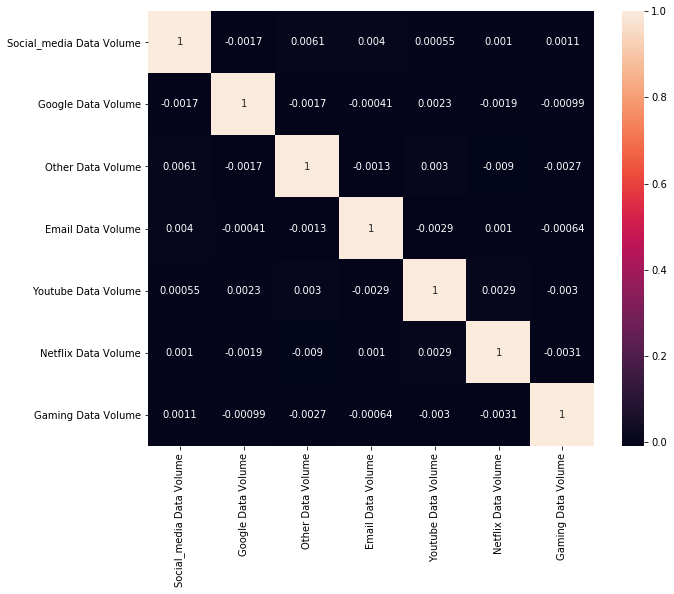

In [87]:
df_2 = data[['Social_media Data Volume','Google Data Volume',\
        'Other Data Volume', 'Email Data Volume','Youtube Data Volume', 'Netflix Data Volume', \
         'Gaming Data Volume']]

fig, ax = plt.subplots(figsize = (10,8))
corrMatrix_2 = df_2.corr()
sns.heatmap(corrMatrix_2, annot = True)
plt.show()

## Dimensionality Reduction

In [93]:
data2.columns

Index(['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Social_media Data Volume', 'Google Data Volume', 'Other Data Volume',
       'Email Data Volume', 'Youtube Data Volume', 'Netflix Data Volume',
       'Gaming Data Volume', 'Total Data Volume'],
      dtype='object')

In [105]:
df = data_mb.drop('Bearer Id', axis = 1)

In [167]:
def missing_values(df):
    
    num = df.select_dtypes(include = ['float64','int64','int','float']).columns
    cat = df.select_dtypes(include = ['object']).columns
    
    imputer = SimpleImputer(missing_values = np.nan,  strategy ='mean')
    imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    
    
    for col in num:
        
        x = df[col].values
        x = x.reshape(-1,1)
        x = imputer.fit_transform(x)
        df[col] = x
        
    #imputer2.fit_transform(df.loc[:,cat].values.reshape(-1,1))
        
    return df

In [168]:
df = missing_values(data2)

In [171]:
scaled_X = StandardScaler().fit_transform(df.drop('Bearer Id', axis = 1))

pca_ = PCA()
pca_ = pca_.fit(scaled_X)

In [173]:
pca_.explained_variance_ratio_

array([2.72653517e-01, 1.40751138e-01, 9.18226533e-02, 9.15309947e-02,
       9.12511374e-02, 9.08590811e-02, 9.00789555e-02, 8.96563206e-02,
       4.13789456e-02, 1.72571992e-05, 6.46220812e-32])

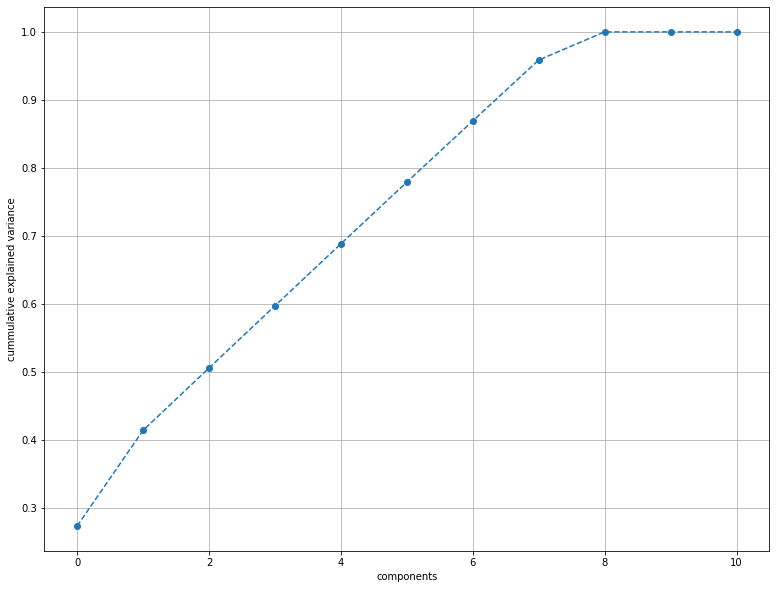

In [177]:
plt.figure(figsize = (13,10))
plt.plot(range(11), pca_.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')
plt.grid(True)

In [178]:
pca_r = PCA(n_components= 7)
pca_R = pca_r.fit_transform(scaled_X)

# Track User Engagement:

#### Session Frequency

In [185]:
data2['MSISDN/Number'] = data['MSISDN/Number']
sess_freq = data2.groupby(['MSISDN/Number']).agg({'Dur. (ms).1':'sum','Bearer Id':'count','Total Data Volume':'sum'}).reset_index()

In [186]:
sess_freq.head()

,MSISDN/Number,Dur. (ms).1,Bearer Id,Total Data Volume
0,3197020876596.0,877385325.0,1,232123971.0
1,33601001722.0,116720140.0,1,878690574.0
2,33601001754.0,181230963.0,1,156859643.0
3,33601002511.0,134969374.0,1,595966483.0
4,33601007832.0,49878024.0,1,422320698.0


In [187]:
# sort the values in descending order
sorted_sess_freq_dur = sess_freq[['MSISDN/Number','Dur. (ms).1']].sort_values(by = 'Dur. (ms).1', ascending = False)

In [188]:
# sort values in descending order
sorted_sess_freq_sess = sess_freq[['MSISDN/Number','Bearer Id']].sort_values(by = 'Bearer Id', ascending = False)

In [189]:
# sort values in descending order
sorted_sess_freq_data = sess_freq[['MSISDN/Number','Total Data Volume']].sort_values(by = 'Total Data Volume', ascending = False)

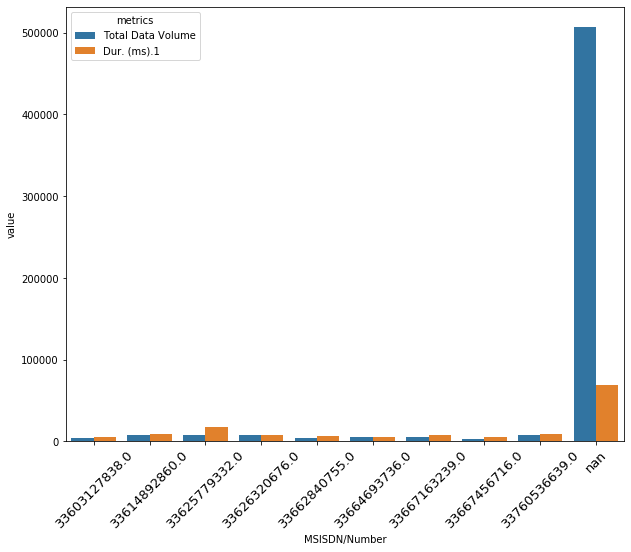

In [190]:
# sort engaged_df values in descending order
engaged_df = sorted_sess_freq_dur.merge(sorted_sess_freq_sess , on = 'MSISDN/Number').merge(sorted_sess_freq_data, on = 'MSISDN/Number')
# convert engaged df values from bytes to megabytes so that can be well visualised
engaged_df_mb = engaged_df[['MSISDN/Number','Total Data Volume','Dur. (ms).1']].applymap(bytes_to_megabytes)


eng = pd.melt(id_vars=['MSISDN/Number'], value_vars=['Total Data Volume','Dur. (ms).1'],
        value_name='value', var_name='metrics', frame=engaged_df_mb.head(10))

plt.figure(figsize = (10,8))
sns.barplot(data = eng , x = 'MSISDN/Number',y = 'value', hue = 'metrics')
plt.xticks(rotation=45, fontsize=13)
plt.show()

## Normalize and Kmeans

In [ ]:
data_scaled.

In [205]:
data2['Bearer Id'] = pd.to_numeric(data2['Bearer Id'] , errors = 'coerce')

data_ = data2[['Bearer Id','Total Data Volume','Dur. (ms).1']]

data_scaled = np.log1p(data_)

kmean = KMeans(n_clusters=3, init='k-means++', random_state=0)
km_data = kmean.fit_predict(data_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [166]:
data_norm2 = pd.DataFrame(data_scaled, columns = ['Bearer Id','Total Data Volume','Dur. (ms).1'])

In [167]:
data_norm2['clusters'] = km_data
data_norm2.head()

,Bearer Id,Total Data Volume,Dur. (ms).1,clusters
0,44.020249,19.660878,21.324107,0
1,44.020249,20.376803,21.034497,0
2,44.020249,19.544607,21.032046,0
3,44.020249,20.606005,21.002041,0
4,44.020249,20.225161,20.808534,0


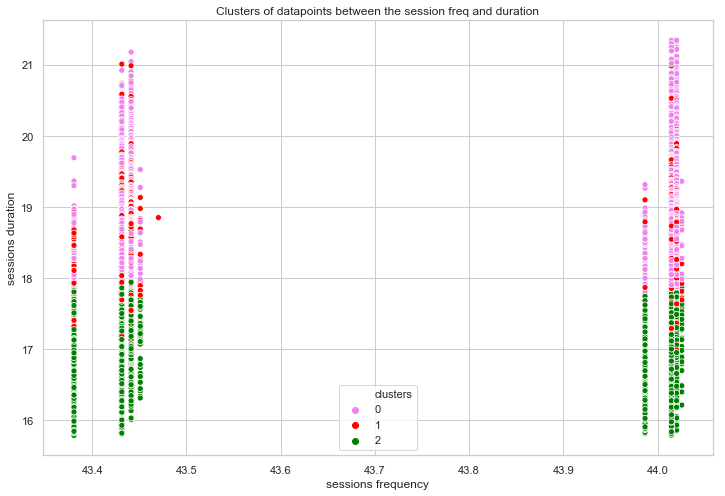

In [168]:

# frequency and duration
x = data_norm2[['Bearer Id','Dur. (ms).1', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = data_norm2['Bearer Id'],  y = data_norm2['Dur. (ms).1'], palette = ['violet', 'red','green'], hue = data_norm2['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and duration')
plt.xlabel('sessions frequency')
plt.ylabel('sessions duration')
plt.legend()